In [1]:
import keras

Using TensorFlow backend.


In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [4]:
Standard1=StandardScaler()
Standard1.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
x_test=Standard1.transform(x_test)
x_train=Standard1.transform(x_train)

In [6]:
x_train.shape

(404, 13)

In [7]:
x_test.shape

(102, 13)

In [60]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.regularizers import l2,l1_l2
from keras.callbacks import EarlyStopping

In [72]:
model=Sequential()
model.add(Dense(units=128,activation="relu",kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01),input_shape=(13,)))
model.add(Dropout(0.1))
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=16,activation="relu"))
model.add(Dense(units=1))

In [73]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 128)               1792      
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 17        
Total params: 11,105
Trainable params: 11,105
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(loss="mse",optimizer="adam",metrics=['mse'])

In [75]:
Mod=model.fit(x_train,y_train,batch_size=32,callbacks=[EarlyStopping(patience=3)],epochs=100,validation_split=0.2)

Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 1s 3ms/step - loss: 565.3081 - mean_squared_error: 563.3205 - val_loss: 610.6370 - val_mean_squared_error: 608.6474
Epoch 2/100
323/323 [==============================] - 0s 181us/step - loss: 515.7032 - mean_squared_error: 513.7065 - val_loss: 549.1384 - val_mean_squared_error: 547.1259
Epoch 3/100
323/323 [==============================] - 0s 137us/step - loss: 445.7317 - mean_squared_error: 443.7024 - val_loss: 453.6922 - val_mean_squared_error: 451.6339
Epoch 4/100
323/323 [==============================] - 0s 206us/step - loss: 339.4771 - mean_squared_error: 337.3927 - val_loss: 315.3987 - val_mean_squared_error: 313.2727
Epoch 5/100
323/323 [==============================] - 0s 172us/step - loss: 204.6262 - mean_squared_error: 202.4668 - val_loss: 161.3942 - val_mean_squared_error: 159.1876
Epoch 6/100
323/323 [==============================] - 0s 140us/step - loss: 93.6891 - mean_

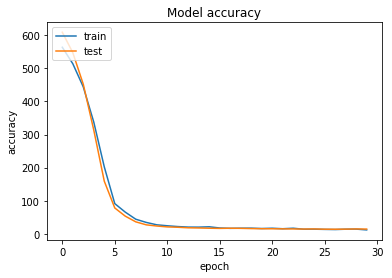

In [80]:
import matplotlib.pyplot as plt
plt.plot(Mod.history['mean_squared_error'])
plt.plot(Mod.history['val_mean_squared_error'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [79]:
Mod.history

{'val_loss': [610.6369557321807,
  549.1384073893229,
  453.6921661753713,
  315.3987390965591,
  161.39419225998867,
  80.58247789924528,
  55.882615736973136,
  38.71765527607482,
  29.682940424224476,
  26.11434469105285,
  23.43005645422288,
  22.36731771775234,
  20.7340314299972,
  20.20808275246326,
  19.462699230806326,
  18.9416761516053,
  19.40735310684016,
  19.070601027688863,
  18.375889483793284,
  17.941182065893102,
  17.75680246470887,
  17.5076030448631,
  17.24258824336676,
  16.936295250315727,
  17.222935170303156,
  16.471772605990186,
  16.37789468412046,
  16.67105608810613,
  17.19894137205901,
  16.859845597066997],
 'val_mean_squared_error': [608.6473927438994,
  547.1259136435426,
  451.6339386363088,
  313.272732016481,
  159.1875776126061,
  78.31516600243839,
  53.60076833654333,
  36.440953549043634,
  27.404582541665913,
  23.837298287285698,
  21.152478853861492,
  20.096386473855855,
  18.46163476543662,
  17.938026981589235,
  17.196605023042654,
  